# 11.1 CFA

We start with importing the dataset:

In [1]:
import semopy

data = semopy.examples.holzinger39.get_data()
data

id  sex  ageyr  agemo       school  grade        x1    x2     x3  \
1      1    1     13      1      Pasteur    7.0  3.333333  7.75  0.375   
2      2    2     13      7      Pasteur    7.0  5.333333  5.25  2.125   
3      3    2     13      1      Pasteur    7.0  4.500000  5.25  1.875   
4      4    1     13      2      Pasteur    7.0  5.333333  7.75  3.000   
5      5    2     12      2      Pasteur    7.0  4.833333  4.75  0.875   
..   ...  ...    ...    ...          ...    ...       ...   ...    ...   
297  346    1     13      5  Grant-White    8.0  4.000000  7.00  1.375   
298  347    2     14     10  Grant-White    8.0  3.000000  6.00  1.625   
299  348    2     14      3  Grant-White    8.0  4.666667  5.50  1.875   
300  349    1     14      2  Grant-White    8.0  4.333333  6.75  0.500   
301  351    1     13      5  Grant-White    NaN  4.333333  6.00  3.375   

           x4    x5        x6        x7    x8        x9  
1    2.333333  5.75  1.285714  3.391304  5.75  6.361111  
2    1.666667  3.00  1.285714  3.782609  6.25  7.916667  
3    1.000000  1.75  0.428571  3.260870  3.90  4.416667  
4    2.666667  4.50  2.428571  3.000000  5.30  4.861111  
5    2.666667  4.00  2.571429  3.695652  6.30  5.916667  
..        ...   ...       ...       ...   ...       ...  
297  2.666667  4.25  1.000000  5.086957  5.60  5.250000  
298  2.333333  4.00  1.000000  4.608696  6.05  6.083333  
299  3.666667  5.75  4.285714  4.000000  6.00  7.611111  
300  3.666667  4.50  2.000000  5.086957  6.20  4.388889  
301  3.666667  5.75  3.142857  4.086957  6.95  5.166667  

[301 rows x 15 columns]

## Performing CFA

As for path modelling, we will use the `semopy` package for running our CFA. We can use the standard string-based syntax to define three latent variables (visual, text and speed) and fit the model:

In [2]:
desc = '''visual =~ x1 + x2 + x3
          text =~ x4 + x5 + x6
          speed =~ x7 + x8 + x9
          '''

model = semopy.Model(desc)
results = model.fit(data)
print(results)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.283
Number of iterations: 28
Params: 0.554 0.731 1.113 0.926 1.180 1.083 0.383 0.174 0.262 0.980 0.408 0.808 0.550 1.133 0.844 0.371 0.446 0.356 0.800 0.488 0.566


We can then have a look at the estimates:

In [3]:
estimates = model.inspect()
print(estimates)

      lval  op    rval  Estimate  Std. Err    z-value   p-value
0       x1   ~  visual  1.000000         -          -         -
1       x2   ~  visual  0.554421  0.099727   5.559413       0.0
2       x3   ~  visual  0.730526   0.10918   6.691009       0.0
3       x4   ~    text  1.000000         -          -         -
4       x5   ~    text  1.113076  0.065392  17.021522       0.0
5       x6   ~    text  0.926120  0.055425  16.709493       0.0
6       x7   ~   speed  1.000000         -          -         -
7       x8   ~   speed  1.179980  0.165045   7.149459       0.0
8       x9   ~   speed  1.082517  0.151354   7.152197       0.0
9    speed  ~~   speed  0.383377  0.086171   4.449045  0.000009
10   speed  ~~    text  0.173603  0.049316   3.520223  0.000431
11   speed  ~~  visual  0.262135  0.056252   4.659977  0.000003
12    text  ~~    text  0.980034  0.112145   8.739002       0.0
13    text  ~~  visual  0.408277  0.073527    5.55273       0.0
14  visual  ~~  visual  0.808310  0.1452

and fit measures:

In [4]:
stats = semopy.calc_stats(model)
print(stats.T)

                      Value
DoF            2.400000e+01
DoF Baseline   3.600000e+01
chi2           8.530573e+01
chi2 p-value   8.501896e-09
chi2 Baseline  9.188516e+02
CFI            9.305594e-01
GFI            9.071605e-01
AGFI           8.607407e-01
NFI            9.071605e-01
TLI            8.958391e-01
RMSEA          9.227505e-02
AIC            4.143318e+01
BIC            1.192825e+02
LogLik         2.834077e-01


### Model estimates

- **Loadings**: The `Estimate` column for the first 9 lines represents the loadings of the 9 measured variables on the 3 factors. You may notice that one loading per factor is set to 1. This is done to identify the factor (see lecture for details). The `Std. Err` column shows the uncertainty associated with the estimate. The `z-value` represents how many standard deviation the estimate is away from zero. The last column `p-value` contains the p-value (probability) for testing the null hypothesis that the parameter equals zero in the population.

- **Variances**: Lines 9 (`speed  ~~  speed`), 12 and 13 show the variances of the respective latent factors.

- **Covariances**: The lines 10 (`speed  ~~   text`), 11, 14 show the covariances, e.g. the associations between the latent variables. Since all estimates are positive and significantly different from zero (see `p-value`), we can infer that the latent factors are positively associated with each other.

- **Residual Variances**: The last 9 lines show the residual variances of the measured variables. Remember, in CFA/SEM we aim at finding latent variables that explain variance in measured variables. However, most of the times, the latent variables can't account for 100% of the variance in a measured variable. In fact, as all residual variances are significantly different from zero (see `p-value`), we can infer that there is still a significant amount of variance in each measured variable that is not explained by the respective latent factor.

```{admonition} Learning break
:class: note

1. How can you calculate the z-value yourself? 
2. When should you read a `variable ~~ variable` output as variance? When instead as residual variance?

```
```{admonition} Variance or Residual variance?
:class: tip

As a general rule, determining whether `variable ~~ variable` represents variance or residual variance depends on whether the variable is explained by the model. If a `variable` is **exogenous**, the estimate reflects its variance. If a variable is **endogenous**, the estimate represents its residual variance. Specifically:
- `exogenous_variable ~~ exogenous_variable` → **Variance**
- `endogenous_variable ~~ endogenous_variable` → **Residual Variance**

```

### Fit measures

To assess model fit, `semopy` provides us with a wide range of fit measures. Let's interpret the ones we know from the lecture.

- `chi2` / `chi2 p-value`: The $\chi^2$-Test tests the null hypothesis that the model implied covariance matrix is equal to the empirical (actual) covariance matrix. Therefore, a **low** test statistic (and a non-significant p-value) indicate good fit. In this case, the p-value is <.05, meaning that there is a **significant misfit** (the model’s predicted covariance matrix significantly differs from the observed covariance matrix, indicating that the model might not adequately capture the relationships in your data). 
However, the test statistic of the baseline model (assuming no relationships between the variables, i.e. the worst possible model) is much higher, indicating our model is better than the baseline model - see CFI and TLI.

- `CFI`: The **CFI** compares the fit of your user-specified model to the baseline model, with values closer to 1 indicating that the user model has a much better fit. A CFI of 0.931 suggests a good model fit.

- `TLI`: Similar to CFI, **TLI** also compares your model to the baseline model, penalizing for model complexity. A value close to 1 indicates that your user model has a better fit than the baseline model. TLI of 0.896 is reasonably good, though slightly below the preferred threshold of 0.95.

- `RMSEA`: The **RMSEA** can be seen as a statistic derived from the $\chi^2$ test, adjusted for model complexity and less influenced by sample size. An RMSEA value of <0.08 indicates an adequate fit. In this case, RMSEA = 0.092 suggests a mediocre fit, above the commonly accepted threshold for good fit.

- `LogLik`: These are used to compute information criteria (AIC and BIC). They quantify the likelihood of observing the given the data under the specified model.

- `AIC`: A measure of the relative quality of the statistical model for a given set of data. Lower **AIC** values indicate a better model. This statistic can be only used for comparison but not as an absolute criterion.

- `BIC`:  Similar to AIC, but includes a penalty for the number of parameters in the model. Lower **BIC** values indicate a better model. The sample-size adjusted BIC is more appropriate for smaller sample sizes. Also similar to the AIC, the BIC is only used for model comparison.


### Visualizing the Model

For visualization, we can plot our model specified model using the following code.

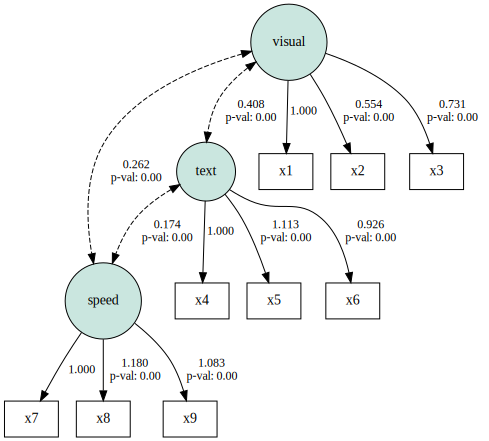

In [5]:
semopy.semplot(model, plot_covs = True, filename='data/cfa_plot.pdf')

## Fitting an Alternative Model

Next to evaluating our main model using model fit measures, we can also compare it to another model. In the initial model, the latent factors are assumend to covary. However, a model, in which the latent factors are set to be independent might provide a better fit. To specify such a model we need to set the covariances between the factors to be zero.

      lval  op    rval  Estimate  Std. Err    z-value   p-value
0       x1   ~  visual  1.000000         -          -         -
1       x2   ~  visual  0.777690  0.140577   5.532121       0.0
2       x3   ~  visual  1.106134  0.213713   5.175797       0.0
3       x4   ~    text  1.000000         -          -         -
4       x5   ~    text  1.132942  0.067026  16.903003       0.0
5       x6   ~    text  0.924249  0.056397  16.388161       0.0
6       x7   ~   speed  1.000000         -          -         -
7       x8   ~   speed  1.225004  0.189741    6.45619       0.0
8       x9   ~   speed  0.854879  0.121394   7.042191       0.0
9    speed  ~~  visual  0.000000         -          -         -
10   speed  ~~    text  0.000000         -          -         -
11   speed  ~~   speed  0.436378  0.096596   4.517579  0.000006
12    text  ~~  visual  0.000000         -          -         -
13    text  ~~    text  0.968662   0.11212   8.639478       0.0
14  visual  ~~  visual  0.524296  0.1303

                    Value
DoF             27.000000
DoF Baseline    36.000000
chi2           153.527262
chi2 p-value     0.000000
chi2 Baseline  918.851637
CFI              0.856683
GFI              0.832914
AGFI             0.777219
NFI              0.832914
TLI              0.808911
RMSEA            0.124983
AIC             34.979885
BIC            101.707870
LogLik           0.510057


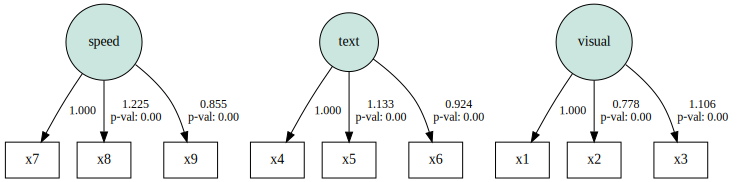

In [6]:
desc2 = '''visual =~ x1 + x2 + x3
           text =~ x4 + x5 + x6
           speed =~ x7 + x8 + x9
           
           # Set covariance to zero
           speed ~~ 0 * visual
           speed ~~ 0 * text
           text ~~ 0 * visual'''

# Fit the model
model2 = semopy.Model(desc2)
results2 = model2.fit(data)

# Print results
estimates2 = model2.inspect()
print(estimates2)

stats2 = semopy.calc_stats(model2)
print(stats2.T)

# Visualise the model
semopy.semplot(model2, filename='data/cfa_plot2.pdf')

We can see that the covariances between the latent factors (e.g. speed  ~~  visual) are now forced to be zero.

## Compare models

To see which of our models provides a better fit, we can compare them. For that, lets print the model fit measures for both models again.

In [7]:
print(stats.T)  # Model 1 (correlated latent factors)
print(stats2.T) # Model 2 (independent latent factors)

                      Value
DoF            2.400000e+01
DoF Baseline   3.600000e+01
chi2           8.530573e+01
chi2 p-value   8.501896e-09
chi2 Baseline  9.188516e+02
CFI            9.305594e-01
GFI            9.071605e-01
AGFI           8.607407e-01
NFI            9.071605e-01
TLI            8.958391e-01
RMSEA          9.227505e-02
AIC            4.143318e+01
BIC            1.192825e+02
LogLik         2.834077e-01
                    Value
DoF             27.000000
DoF Baseline    36.000000
chi2           153.527262
chi2 p-value     0.000000
chi2 Baseline  918.851637
CFI              0.856683
GFI              0.832914
AGFI             0.777219
NFI              0.832914
TLI              0.808911
RMSEA            0.124983
AIC             34.979885
BIC            101.707870
LogLik           0.510057


We can compare model fits by looking at their AIC and BIC. As stated above **lower values** indicate a **better** fit. Here, AIC and BIC both favor the simpler model which assumes indepence between the latent variables.